# ASL Sign Language: Aphabet Gesture Recognition using ML

## Dataset

- Link to dataset source: https://www.kaggle.com/datamunge/sign-language-mnist


- <b>Label/target</b> description - What column in your dataset you are trying to predict? Specify exactly what your target feature (label) is. It must be one of the dataset columns. For image classification, specify your class labels.

- Dataset itself contains three CSV files: train_set, test_set, and combined full_set (train+test sets).

- Feature description: Inside of dataset, there are 34627 samples of 28\*28 pictures, thus the dataset has <b>34627 rows</b> and <b>784 columns + label column</b>. Each column (except 'label') is a pixel values, no RGB values, thus the image is stored in black and white color (grayscale). For visual representation of the data, please see recollected image from CSV pixel values down below, once the dataset is imported. In addition to that, we have 'label' column that has numbers that symbolize alphabet letters accordingly: 0=A, 1=B, etc. Note: Letter 'J' and 'Z' not included, b/c they are shown as moving gestures, thus not suitable for dataset.

- Code for loading, showing the data head, is located in the following cells below.


- Pixels recollected back into images are also shown below.

In [41]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
# Import necessary Python modules
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

# TENSORFLOW IMPORTS
import tensorflow as tf

In [42]:
# making sure same version is used (2.0.0) and Eager Execution is TRUE
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


In [43]:
# Load the data

# we are getting current directory + the folder that contains our datasets
current_Directory = str(os.getcwd() + '\\sign-language-mnist\\')

# once the directory for CSV files is stored we start to gather the data:

# gathering FULL dataset:
full_dataset = pd.read_csv(current_Directory + "\\full_dataset.csv")

# gathering TRAIN dataset
train_set = pd.read_csv(current_Directory + "\\sign_mnist_train.csv")

# gathering TEST dataset:
test_set = pd.read_csv(current_Directory + "\\sign_mnist_test.csv")

In [44]:
# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)

# - full dataset's shape:
print("Full dataset shape:", full_dataset.shape)

Full dataset shape: (34627, 785)


In [45]:
# Show the data head (if pandas is used)
# If the dataset contains images or is non-pandas/non-tabular, show at least one sample of the data
# Create X and y datasets (merged = test + train)
X = full_dataset.drop('label', axis=1)
y = full_dataset['label']

full_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Features Shape:  (34627, 784)
Features:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]

Labels Shape: (34627,)
Labels:
 [3 6 2 ... 2 4 2]


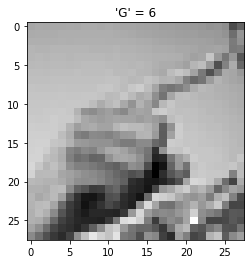

In [46]:
# and visualize the data:
x_visualize = full_dataset.iloc[:, 1:].values
y_visualize = full_dataset.iloc[:, :1].values.flatten()

print('Features Shape: ', x_visualize.shape)
print('Features:\n', x_visualize)

print('\nLabels Shape:', y_visualize.shape)
print('Labels:\n', y_visualize)

# borrowed from https://www.kaggle.com/soumikrakshit/sign-language-translation-mlp
# used to visualize the image
def display(index):
    plt.imshow(x_visualize[index].reshape(28, 28), cmap = 'gray')
    plt.title( "'G' = " + str(y_visualize[index]))
    plt.show()
    
display(1)

## Data Preprocessing

<b>Preprocessing Steps:</b> 
- Convert pandas DataFrame into numpy for Logistic Regression
- drop label from dataset and store rest into X_train/X_test
- store only 'label' column into y_train/y_test datasets
- For MLP Neural Network: reduce pixel values by 255, so that it is easier to train
- For MLP Neural Network: hot encode 'label' values
- For CNN: reduce pixel values by 255, so that it is easier to train
- For CNN: hot encode 'label' values
- For CNN: reshape X_train to feed into Input layer in the form of (28, 28, 1)
<br>

- Specify the details of data splitting to train/test or cross validation. Mention the ratio for splitting and number of folds for cv.
- Both Train and Test sets are stored in separate CSV files. Ratio: 80% Train and 20% Test. 
- For cross validation, cv=10.
- Train and Test were also merged together to produce X and y sets, so there is also full dataset CSV file.
<br>

In [47]:
# Data Preprocessing code here
# and declaring train and test sets as X_train, y_train, X_test, y_test
# train and test were already separated in original dataset zip file

# dropping the column (that we are trying to predict) from X_train
X_train = train_set.drop('label', axis=1)
y_train = train_set['label']

# dropping the column (that we are trying to predict) from X_test
X_test = test_set.drop('label', axis=1)
y_test = test_set['label']

# sets for Neural Network are defined in its own data processing section

# following 2 lines were done earlier for visualization to work:
#X = full_dataset.drop('label', axis=1)
#y = full_dataset['label']

# - train dataset's shape:
print("\nX_train set shape:", X_train.shape)
print("y_train set shape:", y_train.shape)

# - test dataset's shape
print("\nX_test set shape:", X_test.shape)
print("y_test set shape:", y_test.shape)

print("\nX set shape:", X.shape)
print("y shape:", y.shape)


X_train set shape: (27455, 784)
y_train set shape: (27455,)

X_test set shape: (7172, 784)
y_test set shape: (7172,)

X set shape: (34627, 784)
y shape: (34627,)


In [48]:
# This following cells is for Convolutional Network 2D:
input_shape = X_train.shape
print(input_shape)

# we need to get it down to (27455, 28, 28, 1) in order to input it into CNN

(27455, 784)


In [49]:
# list of datasets (in numpy) for CNN's inputs and evaluation, predifined in preprocessing section
X_train_NN = X_train.values
X_test_NN = X_test.values

y_train_Conv = y_train.values
y_test_Conv = y_test.values

# - train dataset's shape:
print("\nX_train_Conv set shape:", X_train_NN.shape)
print("y_train_Conv set shape:", y_train_Conv.shape)

# - test dataset's shape
print("\nX_test_Conv set shape:", X_test_NN.shape)
print("y_test_Conv set shape:", y_test_Conv.shape)


X_train_Conv set shape: (27455, 784)
y_train_Conv set shape: (27455,)

X_test_Conv set shape: (7172, 784)
y_test_Conv set shape: (7172,)


In [50]:
np.unique(y_train)
len(np.unique(y_train))

24

In [51]:
# defining number of classes for y_set categorical set up
number_of_classes = len(np.unique(y_train)) # = 24 classes actually, but letter "J" is missing (#9), because it is dynamic gesture

# casting from list to numpy array
X_train_NN = X_train_NN / 255.0
#np_y_train

X_test_NN = X_test_NN / 255.0
#np_y_test

In [52]:
# categorize train test: doing it manually b/c it was found out that 'J' is missing, which is 9th class
# if we do regular binarize, everything after 'J' shifts by one class and hurts results
# thus it was decided to simply keep 9 as empty array of 0's and technically ignore it due to absense of pixels for it in dataset
# the removal of it and renumbering of classes was not done, because it was found only on CNN analyses that showed the absense of 'J' on confusion matrix
# did not want to renumber due to time, since then it would take a lot of time to rerun SVC, LogReg, RF, and Hard Voting

# categorize train test
y_train_2D = []
length = len(y_train)
for i in range(0, len(y_train)):
    arr = [0] * 25
    arr[y_train[i]] = 1
    y_train_2D.append(arr)

y_train_Conv = np.array(y_train_2D)

# categorize test test
y_test_2D = []
length = len(y_test)
for i in range(0, len(y_test)):
    arr = [0] * 25
    arr[y_test[i]] = 1
    y_test_2D.append(arr)

y_test_Conv = np.array(y_test_2D)

In [53]:
print(y_train_Conv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [54]:
print(y_train_Conv.shape)
print(y_test_Conv.shape)

(27455, 25)
(7172, 25)


In [55]:
number_of_classes = len(y_test.unique())
print("Number of classes:", number_of_classes)

# List of numpy array for X_train, y_train, X_test, y_test:

X_train_Conv = X_train_NN.reshape(X_train_NN.shape[0], 28, 28, 1)
#y_train_Conv

X_test_Conv = X_test_NN.reshape(X_test_NN.shape[0], 28, 28, 1)
#y_test_Conv

# check their shapes
print("X_train.shape: ", X_train_Conv.shape)
print("y_train.shape", y_train_Conv.shape)

print("X_test.shape", X_test_Conv.shape)
print("y_test.shape", y_test_Conv.shape)

# end of data processing for convolutional network

Number of classes: 24
X_train.shape:  (27455, 28, 28, 1)
y_train.shape (27455, 25)
X_test.shape (7172, 28, 28, 1)
y_test.shape (7172, 25)


In [62]:
# Import any necessary method/algorithm modules from sklearn and tf/keras here
from keras.utils import np_utils


# TENSORFLOW IMPORTS:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D

# additional, some defined just in case if needed
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [63]:
# just for reminder of set names:
#X_train_Conv.shape
#y_train_Conv

#X_test_Conv
#y_test_Conv

# check their shapes
print("X_train.shape: ", X_train_Conv.shape)
print("y_train.shape", y_train_Conv.shape)

print("X_test.shape", X_test_Conv.shape)
print("y_test.shape", y_test_Conv.shape)

X_train.shape:  (27455, 28, 28, 1)
y_train.shape (27455, 25)
X_test.shape (7172, 28, 28, 1)
y_test.shape (7172, 25)


In [64]:
# I made a mistake when it was looping over 1st layer, but it still had no more than 92% accuracy, 
# thus let's just start from 2 hidden layers right away

def build_model(n_hidden, n_neurons, double_neurons):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(n_neurons, 3, activation = 'relu', input_shape=(28, 28 ,1) ))
    model.add(tf.keras.layers.MaxPooling2D(2))

    for layer in range(0, n_hidden):
        
        if(double_neurons):            
            model.add(tf.keras.layers.Conv2D(n_neurons, 3, activation = 'relu'))
            model.add(tf.keras.layers.MaxPooling2D(2))
            n_neurons = n_neurons * 2
            
        else:
            model.add(tf.keras.layers.Conv2D(n_neurons, 3, activation = 'relu'))
            model.add(tf.keras.layers.MaxPooling2D(2))
            

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.20))

    model.add(tf.keras.layers.Dense(25, activation = 'softmax'))
    
    return model

In [25]:
'''
layer = 2
for neurons in range(32, 62, 2):
        
    model = build_model(n_hidden=layer, n_neurons=neurons, double_neurons=True)

    model.compile(loss = "categorical_crossentropy", optimizer="adam",
                      metrics=['accuracy'])
        
    history = model.fit(X_train_Conv, y_train_Conv, epochs=5)
        
    y_preds = model.evaluate(X_test_Conv, y_test_Conv, verbose=2)
        
    print("hidden layers:", layer)
    print("neurons in each:", neurons)
    print("Accuracy: ", y_preds[1], "; Loss: ", y_preds[0])
    print("*******\n")
    
'''

'\nlayer = 2\nfor neurons in range(32, 62, 2):\n        \n    model = build_model(n_hidden=layer, n_neurons=neurons, double_neurons=True)\n\n    model.compile(loss = "categorical_crossentropy", optimizer="adam",\n                      metrics=[\'accuracy\'])\n        \n    history = model.fit(X_train_Conv, y_train_Conv, epochs=5)\n        \n    y_preds = model.evaluate(X_test_Conv, y_test_Conv, verbose=2)\n        \n    print("hidden layers:", layer)\n    print("neurons in each:", neurons)\n    print("Accuracy: ", y_preds[1], "; Loss: ", y_preds[0])\n    print("*******\n")\n    \n'

In [65]:
num_of_classes = 25

# from analyses above, it seems that 2 layers and 44 neurons one each work good enough with neurons doulbe each inner layer
# from analyses above, it seems that 2 layers and 44 neurons one each work good enough with neurons doulbe each inner layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(44, 3, activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(tf.keras.layers.MaxPooling2D(2))         
          
model.add(tf.keras.layers.Conv2D(88, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.Conv2D(172, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Dense(25, activation = 'softmax'))

In [66]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

In [68]:
Adam_optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = "categorical_crossentropy", optimizer=Adam_optimizer,
                      metrics=['accuracy'])

In [69]:
history_CNN = model.fit(X_train_Conv, y_train_Conv, validation_data=(X_test_Conv, y_test_Conv), epochs=50, callbacks=[early_stop])

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 23s 830us/sample - loss: 1.3323 - accuracy: 0.5707 - val_loss: 0.5951 - val_accuracy: 0.7755
Epoch 2/50
27455/27455 [==============================] - 22s 797us/sample - loss: 0.1764 - accuracy: 0.9434 - val_loss: 0.3193 - val_accuracy: 0.8986
Epoch 3/50
27455/27455 [==============================] - 22s 789us/sample - loss: 0.0521 - accuracy: 0.9845 - val_loss: 0.3802 - val_accuracy: 0.8958
Epoch 4/50
27455/27455 [==============================] - 22s 792us/sample - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.5152 - val_accuracy: 0.8806
Epoch 5/50
27455/27455 [==============================] - 22s 802us/sample - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.4197 - val_accuracy: 0.9120
Epoch 6/50
27455/27455 [==============================] - 24s 872us/sample - loss: 0.0219 - accuracy: 0.9942 - val_loss: 0.6395 - val_accuracy: 0.8583
Epoch 7/50
27455/27455 [=====================

In [70]:
y_preds = model.evaluate(X_test_Conv, y_test_Conv, verbose=2)

print("Accuracy: ", y_preds[1], "; Loss: ", y_preds[0])

7172/1 - 1s - loss: 0.3750 - accuracy: 0.9257
Accuracy:  0.9256832 ; Loss:  0.3353994174154524


In [71]:
y_pred_CNN = model.predict_classes(X_test_Conv)

In [72]:
y_test_cm = tf.argmax(y_test_Conv, axis=1)
print(y_test_cm)

tf.Tensor([ 6  5 10 ...  2  4  2], shape=(7172,), dtype=int64)


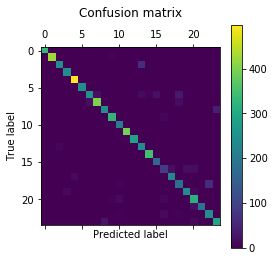

In [73]:
cm_CNN = confusion_matrix(y_test, y_pred_CNN)

# Show confusion matrix in a separate window
plt.matshow(cm_CNN)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
accuracy_CNN = accuracy_score(y_test, y_pred_CNN)
precision_CNN = np.mean(np.diag(cm_CNN) / np.sum(cm_CNN, axis = 1))
recall_CNN = np.mean(np.diag(cm_CNN) / np.sum(cm_CNN, axis = 0))

In [75]:
print(accuracy_CNN)
print(precision_CNN)
print(recall_CNN)

0.9256832124930284
0.9171454480015814
0.917949296455926


In [76]:
accuracy_CNN = model.evaluate(X_test_Conv, y_test_Conv, verbose=2)

7172/1 - 1s - loss: 0.3750 - accuracy: 0.9257


# CNN Plot:

(0, 8)

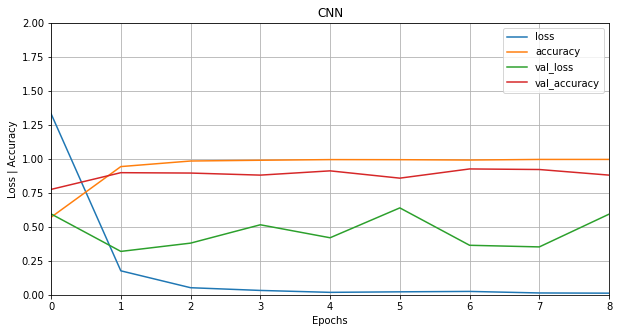

In [77]:
# Convolutional Network:
# Plot shows good results with loss (train and test) going down, while both of the accuracies going up
pd.DataFrame(history_CNN.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.title('CNN')

plt.xlabel('Epochs')
plt.ylabel('Loss | Accuracy')

plt.gca().set_ylim(0, 2)
plt.gca().set_xlim(0, 8) 